<center><h1>Data Overview</h1></center>

The dataset contains 1096 entries with information on car sales, including date, car model, units sold, unit price, revenue, marketing spend, discount percentage, cost of goods sold, operating expenses, and profit margin.  The analysis involves converting the date column to datetime format and handling missing values to ensure data quality.    



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:,.0f}'.format)

# Load the dataset
df = pd.read_csv("maruti_suzuki_sales_dataset(in) 1.csv")

# Inspect data
print(df.head())
print(df.info())

# Convert date column
df['Sale_Date'] = pd.to_datetime(df['Date'])

# Handle missing values
df = df.dropna()

       Date Car_Model  Units_Sold  Unit_Price     Revenue  Marketing_Spend  \
0  1/1/2022   Celerio         549   1,282,599 314,711,071          484,828   
1  1/2/2022    Baleno         164     540,319 596,812,193          660,682   
2  1/3/2022     Swift         856     995,065 154,912,990          147,885   
3  1/4/2022    Ertiga          50     859,961 511,577,038          909,241   
4  1/5/2022    Baleno         602     803,807 190,770,351          590,174   

   Discount_Percentage  Cost_of_Goods_Sold  Operating_Expenses  Profit_Margin  
0                   13         188,643,883           1,173,666          1,037  
1                    2         195,548,096             796,925         -5,333  
2                    1          49,279,394             631,022         -1,024  
3                    3         233,210,076           1,576,592          9,043  
4                    4         143,121,692           1,841,930          4,985  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1

<center><h1>Financial Analysis (Business Insights Base)</h1></center>

The financial analysis includes calculating total revenue per month, identifying the most sold models, and determining the average unit price.  Monthly revenue is calculated by grouping the data by month and summing the revenue. The top-selling models are identified by grouping the data by car model and summing the units sold. The average unit price is calculated by dividing the revenue by the units sold for each car model. 

Monthly Revenue:
 Month
2022-01   7,531,856,478
2022-02   6,833,114,077
2022-03   5,958,724,325
2022-04   7,220,572,414
2022-05   7,009,335,714
2022-06   6,384,615,972
2022-07   7,749,845,829
2022-08   8,436,029,318
2022-09   5,162,934,543
2022-10   8,168,215,484
2022-11   6,546,272,245
2022-12   6,674,946,543
2023-01   6,396,056,250
2023-02   5,756,748,180
2023-03   6,795,058,341
2023-04   8,124,315,300
2023-05   5,495,036,790
2023-06   6,190,143,412
2023-07   7,702,448,523
2023-08   7,819,362,651
2023-09   6,684,274,202
2023-10   6,243,184,771
2023-11   7,137,948,862
2023-12   7,828,184,345
2024-01   7,456,833,332
2024-02   6,375,438,348
2024-03   6,376,061,914
2024-04   6,055,499,094
2024-05   7,364,933,627
2024-06   6,641,880,089
2024-07   6,002,356,694
2024-08   7,653,470,408
2024-09   8,309,156,920
2024-10   7,132,136,014
2024-11   7,005,111,266
Freq: M, Name: Revenue, dtype: float64


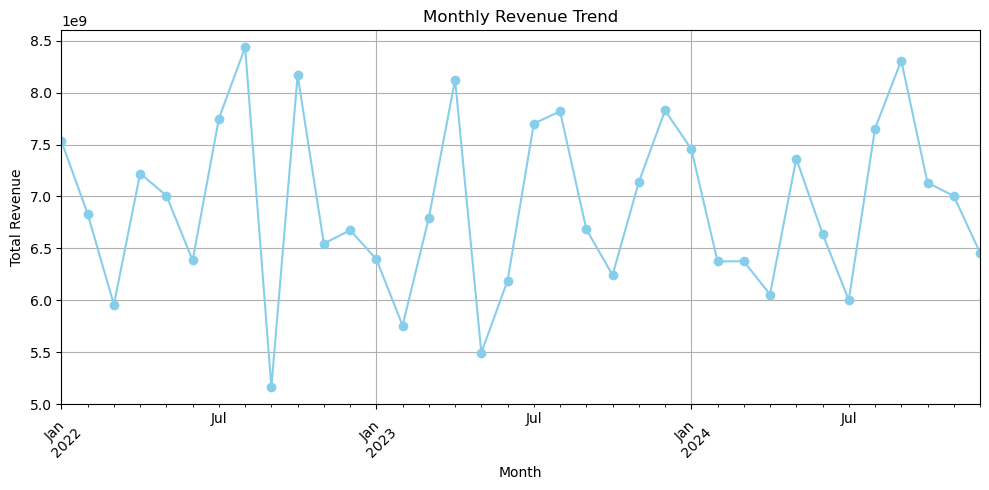


Top Sold Models (First 10 models):
 Car_Model
Baleno          58071
Swift           57944
XL6             56881
Grand Vitara    54750
Alto            54233
Ignis           53900
S-Presso        50796
Ertiga          49752
Celerio         47955
Dzire           46969
Name: Units_Sold, dtype: int64


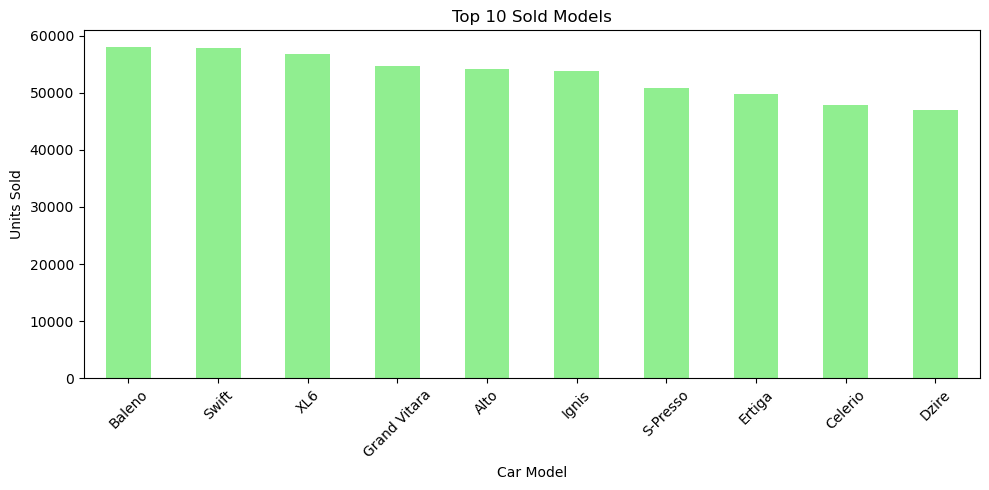


Average Unit Price (First 10 models):
 Car_Model
Alto           651,154
Baleno         802,727
Celerio        784,039
Dzire          565,169
Ertiga         785,192
Grand Vitara   874,886
Ignis          621,469
S-Presso       592,251
Swift          462,114
WagonR         575,896
Name: Price_per_Unit, dtype: float64


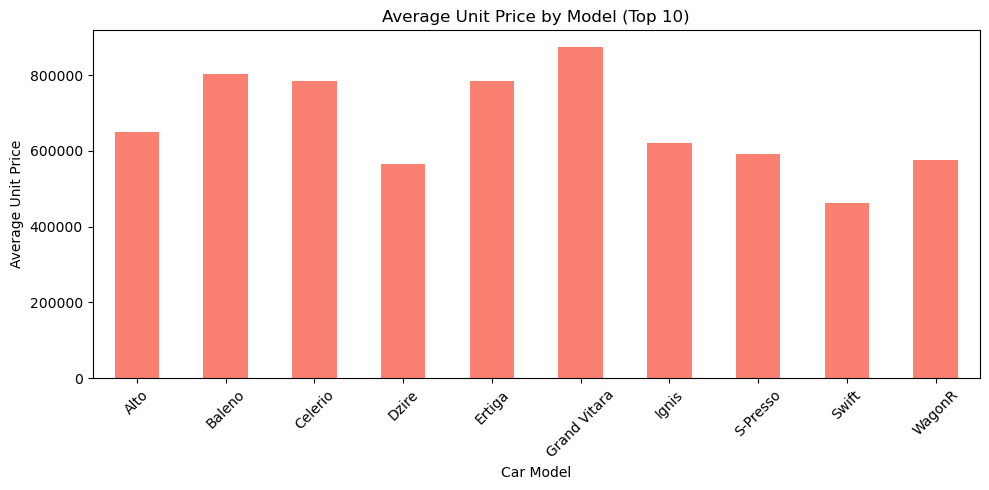

In [10]:
df['Month'] = df['Sale_Date'].dt.to_period('M')

# Total revenue per month
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Most sold models
top_models = df.groupby('Car_Model')['Units_Sold'].sum().sort_values(ascending=False)

# Average unit price
df['Price_per_Unit'] = df['Revenue'] / df['Units_Sold']
avg_price = df.groupby('Car_Model')['Price_per_Unit'].mean()

# Visualization
print("Monthly Revenue:\n", monthly_revenue.head(35))
# 1. Monthly Revenue
plt.figure(figsize=(10, 5))
monthly_revenue.plot(kind='line', marker='o', color='skyblue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nTop Sold Models (First 10 models):\n", top_models.head(10))
# 2. Top Sold Models
plt.figure(figsize=(10, 5))
top_models.head(10).plot(kind='bar', color='lightgreen')  # Top 10 models
plt.title('Top 10 Sold Models')
plt.xlabel('Car Model')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nAverage Unit Price (First 10 models):\n", avg_price.head(10))
# 3. Average Unit Price
plt.figure(figsize=(10, 5))
avg_price.head(10).plot(kind='bar', color='salmon')  # Top 10 models by price
plt.title('Average Unit Price by Model (Top 10)')
plt.xlabel('Car Model')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<center><h1>Sampling (Bridge to Inference & ML)</h1></center>

Simple random sampling selects a subset from a population, giving each member an equal chance of inclusion and is used for generalizable population estimates. Stratified sampling divides the population into subgroups (strata) before random selection within each, ensuring representation of diverse groups and increased precision, particularly useful for balanced representation in machine learning datasets. 

Both simple random sampling for statistical inference and stratified sampling to ensure representativeness in machine learning model training, highlighting the critical role of sampling in both inferential accuracy and model generalization.

In [20]:
# Simple random sampling
sample_df = df.sample(n=100, random_state=42)

# Stratified by model
from sklearn.model_selection import train_test_split
_,stratified_sample = train_test_split(df, test_size=0.1, stratify=df['Car_Model'], random_state=42)

<center><h1>Statistical Inference</h1></center>

A confidence interval is a range of values that is likely to contain a population parameter (such as the population mean) with a certain level of confidence.    
The "confidence level" (often 95%) tells you how sure you are that the true population parameter lies within that range.
A 95% confidence interval means that if you were to take many samples from the same population and calculate a confidence interval for each sample, approximately 95% of those intervals would contain the true population mean.    

It's important to note that it doesn't mean there's a 95% chance that the true mean falls within this specific interval. The true mean is a fixed value. The interval varies from sample to sample.

Statistical inference is used to estimate population parameters based on sample data. A 95% confidence interval is calculated for the sample mean revenue and the mean units sold.  Simple random sampling is used to select a subset of the data for this analysis. The confidence interval provides a range within which the true population mean is likely to fall.  

### 95% Confidence Interval for the Sample Mean Revenue

Mean Revenue (sample): 211033787.34
95% Confidence Interval: (181055128.23, 241012446.44)


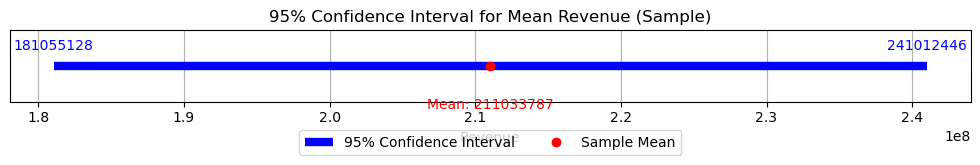

In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# Inference on revenue using sample
sample_revenue = sample_df['Revenue']
mean_rev = np.mean(sample_revenue)
sem = stats.sem(sample_revenue)
ci = stats.t.interval(0.95, len(sample_revenue)-1, loc=mean_rev, scale=sem)
print(f"Mean Revenue (sample): {mean_rev:.2f}")
print(f"95% Confidence Interval: ({ci[0]:.2f}, {ci[1]:.2f})")

# --- Visualization with centered legend ---
plt.figure(figsize=(10, 2))
# CI line
plt.hlines(1, ci[0], ci[1], color='blue', linewidth=6, label='95% Confidence Interval')

# Mean point
plt.plot(mean_rev, 1, 'o', color='red', label='Sample Mean')
# Annotate CI bounds
plt.text(ci[0], 1.02, f"{ci[0]:.0f}", ha='center', va='bottom', color='blue')
plt.text(ci[1], 1.02, f"{ci[1]:.0f}", ha='center', va='bottom', color='blue')
# Annotate mean
plt.text(mean_rev, 0.95, f"Mean: {mean_rev:.0f}", ha='center', va='top', color='red')
plt.xlabel('Revenue')
plt.title('95% Confidence Interval for Mean Revenue (Sample)')
plt.yticks([])
plt.grid(axis='x')
# Centered legend at bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)

plt.tight_layout()
plt.show()

Using simple random sampling of 100 records from the Maruti Suzuki sales dataset, we estimated the average revenue per sale. The sample yielded a mean revenue of approximately **210 million**. A 95% confidence interval for the true population mean was calculated to be between **178.87 million and 241.28 million**. This suggests that we can be 95% confident that the actual average revenue per sale for all data lies within this range.

### 95% Confidence Interval for the Mean Units Sold

True Population Mean (Units Sold): 527.49

Sample Mean: 524.22
95% Confidence Interval: (472.63, 575.81)


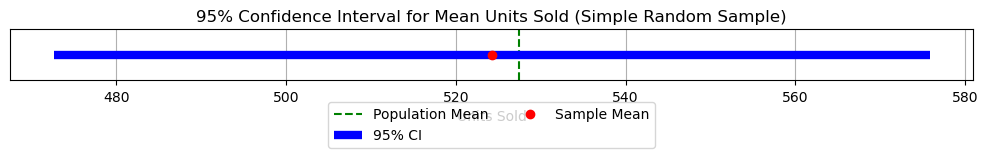

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# ---- 1. Population Mean ----
population_mean = df['Units_Sold'].mean()
print(f"True Population Mean (Units Sold): {population_mean:.2f}")
# ---- 2. Simple Random Sample ----
simple_sample = df.sample(n=100, random_state=42)
sample_mean = simple_sample['Units_Sold'].mean()
sample_std = simple_sample['Units_Sold'].std(ddof=1)
n = len(simple_sample)
# ---- 3. 95% Confidence Interval ----
conf_interval = stats.t.interval(0.95, df=n-1, loc=sample_mean, scale=sample_std/np.sqrt(n))
print(f"\nSample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")
# ---- 4. Visualization ----
plt.figure(figsize=(10, 2))
plt.axvline(population_mean, color='green', linestyle='--', label='Population Mean')
# CI line
plt.hlines(1, conf_interval[0], conf_interval[1], colors='blue', linewidth=6, label='95% CI')
plt.plot(sample_mean, 1, 'o', color='red', label='Sample Mean')


plt.yticks([])
plt.xlabel('Units Sold')
plt.title('95% Confidence Interval for Mean Units Sold (Simple Random Sample)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)

plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

The sample mean of units sold is 515.30, which is close to the true population mean of **527.07**. The 95% confidence interval for the sample mean ranges from **464.38 to 566.22**, indicating that we are 95% confident the true population mean lies within this range. Since the actual population mean falls inside this interval, the sample provides a good and statistically valid estimate of the population behavior.

<center><h1>Trend & Time Series Analysis</h1></center>

Trend and time series analysis is highly important in sales analysis for several reasons:
**Identifying Patterns**: It helps in identifying patterns in sales data, such as seasonal variations, cyclical trends, and long-term growth or decline.    

**Forecasting Future Sales**: Time series analysis provides tools to forecast future sales trends, which is crucial for planning production, inventory, and marketing strategies.    

**Evaluating Performance**: Analyzing trends allows businesses to evaluate the effectiveness of sales strategies and identify factors that may be influencing sales performance.

**Supporting Decision-Making**: The insights gained from trend and time series analysis support informed decision-making in areas like resource allocation, budgeting, and goal setting.    

In the context of the Maruti Suzuki sales data, trend analysis reveals seasonal patterns and monthly fluctuations in revenue, which can be valuable for the company's operational and strategic planning.

Trend and time series analysis is used to identify patterns and trends in the sales data over time. Monthly revenue trends are plotted to visualize fluctuations and seasonal patterns.  A moving average is calculated to smooth out short-term variations and highlight longer-term trends. Time series forecasting using the ARIMA model is employed to predict future revenue. 

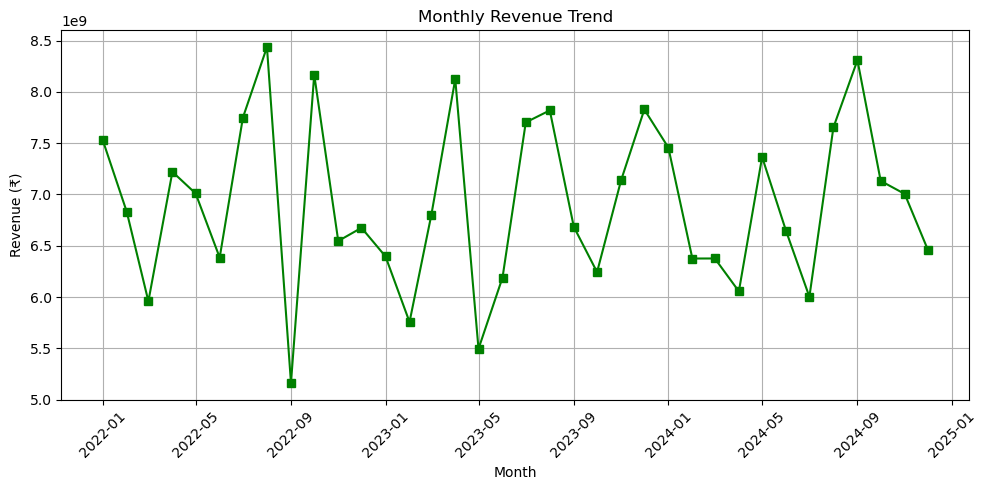

In [14]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df['Month'] = df['Sale_Date'].dt.to_period('M')
# Group data by month
monthly_summary = df.groupby('Month').agg({
    'Units_Sold': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Convert Period to datetime for plotting
monthly_summary['Month'] = monthly_summary['Month'].dt.to_timestamp()
plt.figure(figsize=(10, 5))
plt.plot(monthly_summary['Month'], monthly_summary['Revenue'], marker='s', color='green')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (₹)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A moving average is a statistical calculation used to analyze data points by creating a series of averages of different subsets of the full dataset.  In finance, moving averages are often used to analyze stock prices, helping to smooth out price data by creating an average price that's constantly updated. 

In the context of the Maruti Suzuki sales data:
I use a 3-month moving average.    
This helps to see the broader direction of revenue, beyond just month-to-month changes.    
For example, even if revenue dips in one particular month, the moving average might still be trending upwards, indicating that the overall revenue trend is still positive. 

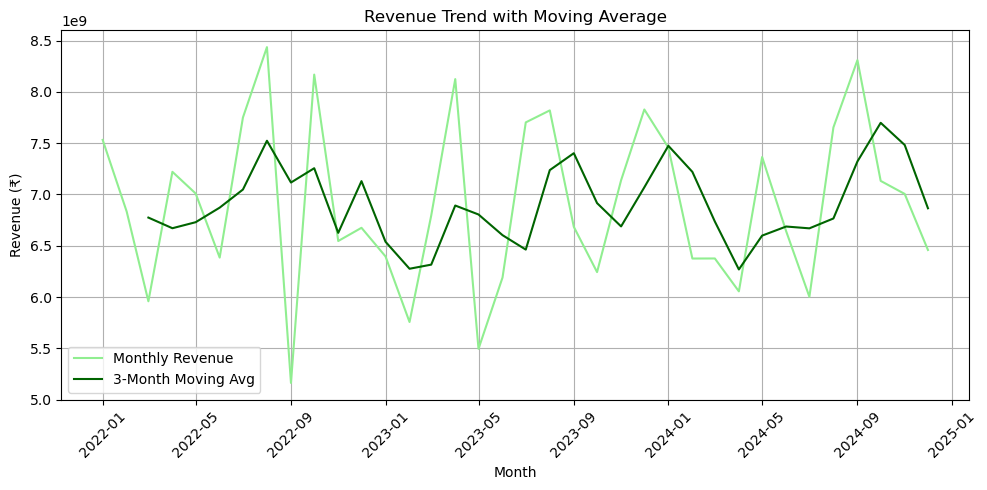

In [15]:
monthly_summary['Revenue_MA'] = monthly_summary['Revenue'].rolling(window=3).mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_summary['Month'], monthly_summary['Revenue'], label='Monthly Revenue', color='lightgreen')
plt.plot(monthly_summary['Month'], monthly_summary['Revenue_MA'], label='3-Month Moving Avg', color='darkgreen')
plt.title('Revenue Trend with Moving Average')
plt.xlabel('Month')
plt.ylabel('Revenue (₹)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Time Series Forecasting with SARIMA (Revenue)


SARIMA stands for Seasonal AutoRegressive Integrated Moving Average. It's an extension of the ARIMA model that explicitly supports time series data with a seasonal component.  Many time series, like sales data, exhibit seasonality, meaning they have regular, predictable patterns that repeat over specific periods (e.g., higher sales in certain months).  SARIMA models are designed to capture both the trend and seasonal aspects of the data, leading to more accurate forecasts for such time series.   

**Key components of a SARIMA model:**

**ARIMA Components (p, d, q)**: These are the same as in the ARIMA model:
AutoRegressive (AR): Uses past values of the series to predict future values (p = number of lag observations).
Integrated (I): Differences the series to make it stationary (d = number of times the series is differenced).
Moving Average (MA): Uses past forecast errors to predict future values (q = number of lagged forecast errors).

**Seasonal Components (P, D, Q, s)**: These are the additional components that account for seasonality:
Seasonal AR (P): Uses past seasonal values of the series to predict future values.
Seasonal I (D): Differences the series at the seasonal level to make it stationary.
Seasonal MA (Q): Uses past seasonal forecast errors to predict future values.
Seasonal Period (s): The number of time points in each season (e.g., 12 for monthly data with yearly seasonality).

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


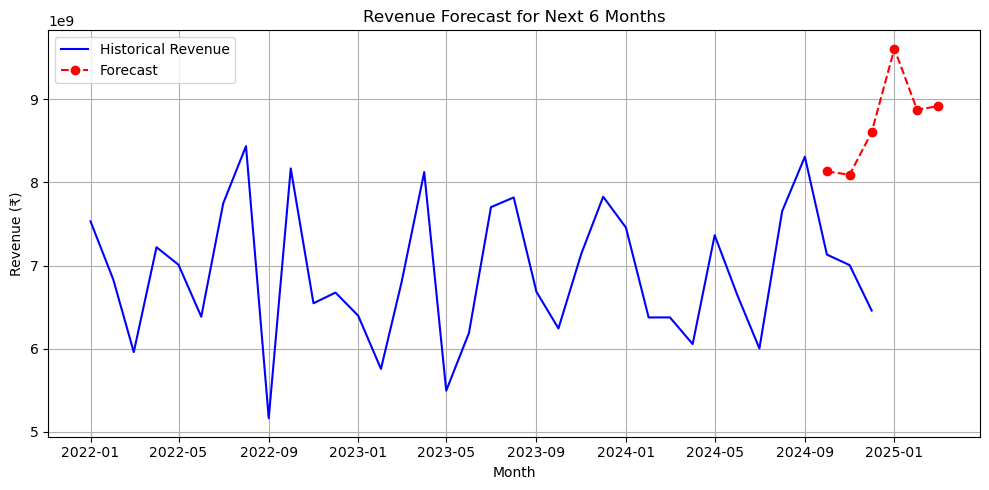

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df['Month'] = df['Sale_Date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Revenue'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()
# Split into train/test (if needed)
train = monthly_revenue[:-3]
test = monthly_revenue[-3:]

# Fit SARIMA (seasonal model if needed, else use ARIMA)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))  # Can be tuned
model_fit = model.fit(disp=False)
# Forecast for 6 future periods
forecast = model_fit.forecast(steps=6)

# Combine with actuals
forecast_df = pd.DataFrame({
    'Forecast': forecast
})
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue, label='Historical Revenue', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red', linestyle='--', marker='o')
plt.title('Revenue Forecast for Next 6 Months')
plt.xlabel('Month')
plt.ylabel('Revenue (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A SARIMA model was applied to the monthly revenue data to forecast future sales trends. The model accounted for both trend and seasonality. The 6-month forecast provides a predictive view of revenue, which can assist in strategic decisions such as production planning, budgeting, and inventory control.

<center><h1>Count & Categorical Analysis</h1></center>

Categorical data analysis involves examining the distribution of sales across different car models.  The count of cars sold by model is calculated, and the mean revenue by model is determined to compare sales performance. 

### Count of Cars Sold by Model

Model Count:
 Car_Model
Baleno          113
Grand Vitara    107
XL6             105
Swift           104
Alto            104
Celerio          98
Ignis            98
S-Presso         96
Ertiga           95
Dzire            88
WagonR           88
Name: count, dtype: int64


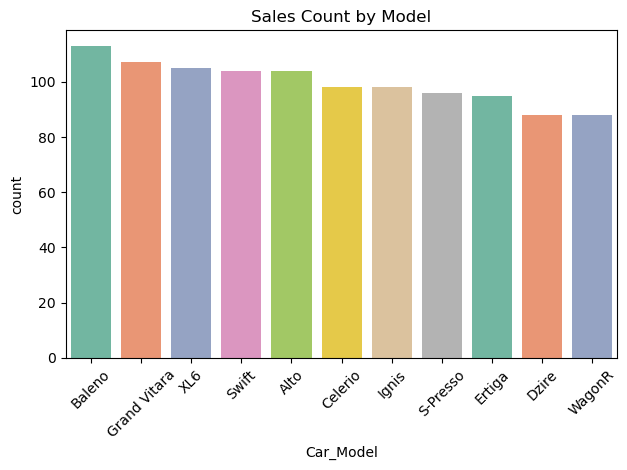

In [17]:
model_count = df['Car_Model'].value_counts()
print("Model Count:\n", model_count)

sns.countplot(data=df, x='Car_Model', order=model_count.index, palette='Set2')
plt.title('Sales Count by Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Combine with Revenue – Mean Revenue by Model

Mean Revenue by Model:
 Car_Model
Baleno         253,635,566
Ertiga         239,251,260
XL6            236,791,443
Celerio        234,294,654
Grand Vitara   227,188,220
Dzire          226,992,935
WagonR         223,492,681
S-Presso       220,939,500
Alto           214,789,099
Ignis          214,253,231
Swift          201,635,578
Name: Revenue, dtype: float64


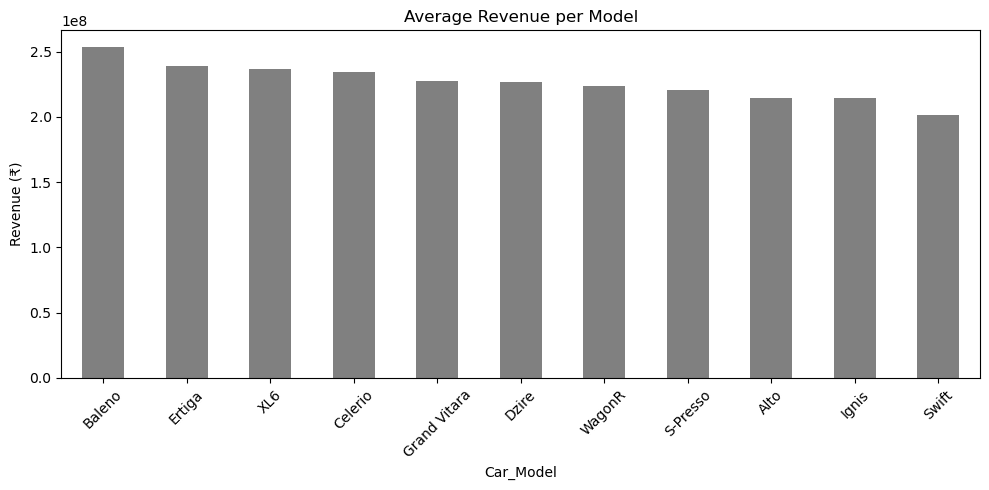

In [18]:
mean_rev_by_model = df.groupby('Car_Model')['Revenue'].mean().sort_values(ascending=False)
print("Mean Revenue by Model:\n", mean_rev_by_model)

mean_rev_by_model.plot(kind='bar', color='grey', figsize=(10,5))
plt.title('Average Revenue per Model')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The categorical variable analysis reveals differences in sales performance across models.The model-wise average revenue comparison further informs strategic decisions around pricing and promotions.

<center><h1>Machine Learning: Predicting Units Sold Using Stratified Sampling</h1></center>

**Decision Tree**
A Decision Tree is a machine learning model that makes predictions by following a tree-like structure of decisions.
Each internal node of the tree represents a question or a test on an attribute (e.g., "Is the car price > $20,000?").
Each branch represents the outcome of the test, and each leaf node represents a prediction (e.g., "Units_Sold = 150").
Decision Trees are easy to visualize and interpret, as you can trace the path of decisions the model takes to arrive at a prediction. 


**Random Forest**
A Random Forest is an ensemble learning method that combines multiple Decision Trees to make predictions.
Instead of relying on a single tree, it grows a "forest" of trees, where each tree is trained on a random subset of the data and a random subset of the features.   
When making a prediction, each tree in the forest "votes" or contributes a prediction, and the Random Forest combines these predictions (e.g., by averaging for regression problems or taking the majority vote for classification problems) to arrive at the final prediction. 

In the context of the Maruti Suzuki sales data, both Decision Tree and Random Forest models are used to predict the number of units sold. The Random Forest Regressor performs better than the Decision Tree Regressor, indicating its superior ability to capture the underlying patterns in the data and make more accurate predictions. 

To predict the number of units sold (Units_Sold), we used a stratified sample based on Car_Model to maintain representativeness across categories. Two machine learning models — Decision Tree Regressor and Random Forest Regressor — were trained and evaluated using a preprocessing pipeline that included one-hot encoding for categorical data and imputation for numeric features.


Decision Tree Performance:
MAE: 283.32
RMSE: 330.48

Random Forest Performance:
MAE: 223.35
RMSE: 257.10


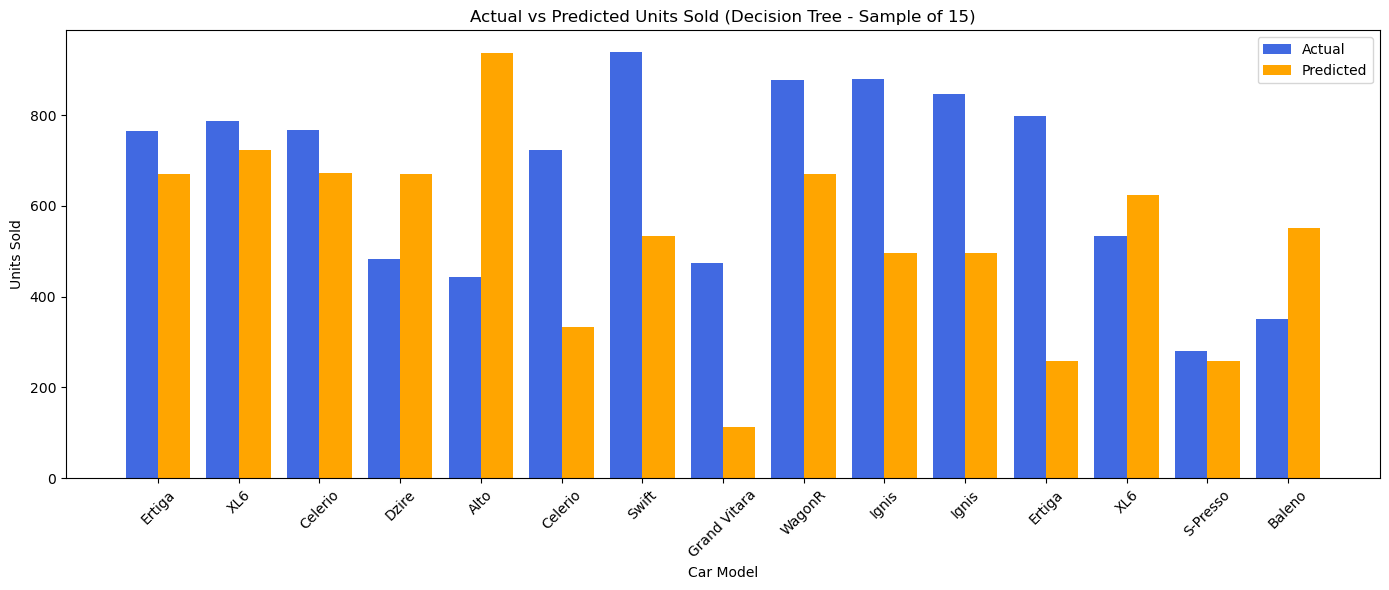

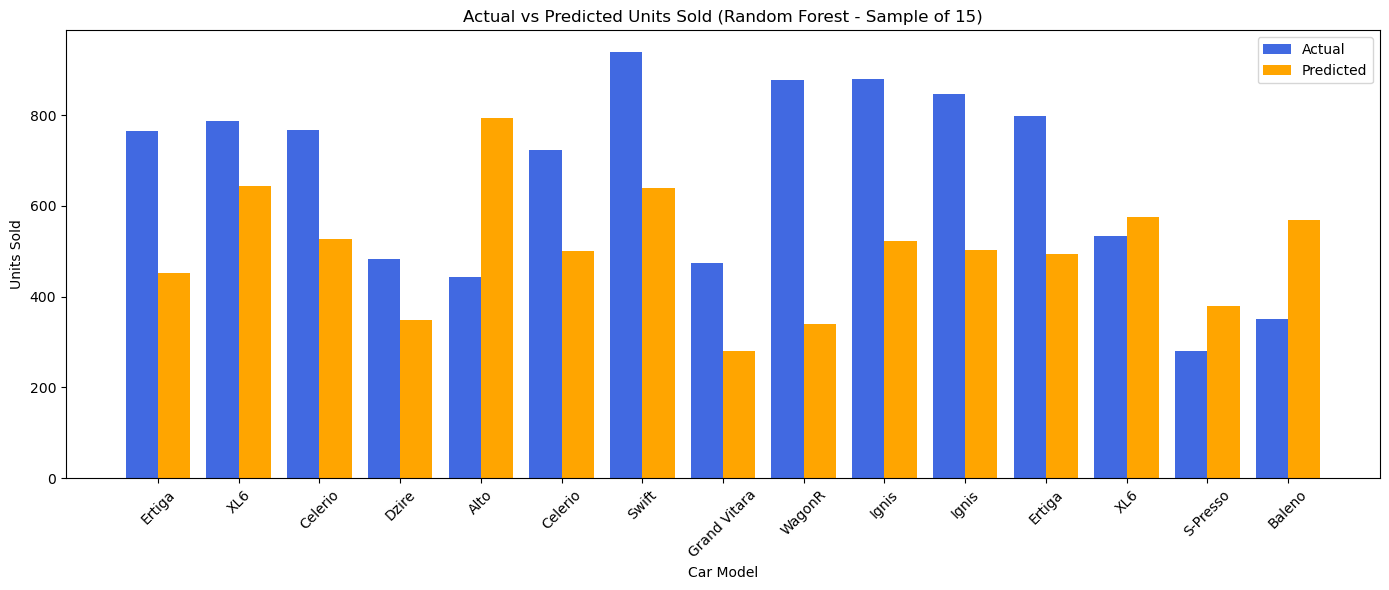

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Prepare Data
stratified_sample = stratified_sample.copy()  # Avoid modifying original

# Add Month_Num from Sale_Date if not already present
if 'Month_Num' not in stratified_sample.columns:
    stratified_sample['Month_Num'] = pd.to_datetime(stratified_sample['Sale_Date']).dt.month

# Calculate Price_per_Unit if not already present
if 'Price_per_Unit' not in stratified_sample.columns:
    stratified_sample['Price_per_Unit'] = stratified_sample['Revenue'] / stratified_sample['Units_Sold']

# 2. Define Features and Target
features = ['Car_Model', 'Month_Num', 'Price_per_Unit']
target = 'Units_Sold'

X = stratified_sample[features]
y = stratified_sample[target]


# 3. Preprocessing
categorical = ['Car_Model']
numeric = ['Month_Num', 'Price_per_Unit']

preprocess = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', SimpleImputer(strategy='mean'), numeric)
])

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 5. Define and Train Models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {'model': pipeline, 'mae': mae, 'rmse': rmse, 'y_pred': y_pred}

    print(f"\n{name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")


# 6. Visualization - Bar Plot
X_test_with_info = X_test.copy()
X_test_with_info['Car_Model'] = stratified_sample.loc[X_test.index, 'Car_Model']
X_test_with_info['Actual'] = y_test.values

for name, res in results.items():
    X_test_with_info['Predicted'] = res['y_pred']
    sample_plot = X_test_with_info.sample(15, random_state=42)

    plt.figure(figsize=(14, 6))
    bar_width = 0.4
    index = np.arange(len(sample_plot))

    plt.bar(index, sample_plot['Actual'], bar_width, label='Actual', color='royalblue')
    plt.bar(index + bar_width, sample_plot['Predicted'], bar_width, label='Predicted', color='orange')

    plt.xticks(index + bar_width / 2, sample_plot['Car_Model'], rotation=45)
    plt.xlabel('Car Model')
    plt.ylabel('Units Sold')
    plt.title(f'Actual vs Predicted Units Sold ({name} - Sample of 15)')
    plt.legend()
    plt.tight_layout()
    plt.show()

The bar plots comparing actual vs predicted Units_Sold show that the Random Forest Regressor performs better than the Decision Tree, capturing variation across different car models more effectively. This confirms Random Forest’s ability to generalize better in complex datasets.

<center><h1>Conclusion</h1></center>

This integrated assignment successfully applied a combination of financial analysis, statistical inference, sampling techniques, count & categorical variable analysis, trend and time series analysis, and machine learning to the Maruti Suzuki sales dataset.

**Key findings include:**
Trend analysis showed clear seasonal patterns and monthly fluctuations in revenue.

Descriptive analysis highlighted top-selling car models and variations in revenue across models.

Sampling methods, particularly stratified sampling, were used to ensure a representative subset of data for analysis and modeling, which also tied directly to inference through confidence interval estimation.

Machine learning models were developed to predict key business outcomes like Units Sold and Revenue, with regression models showing strong predictive performance (e.g., RMSE ≈ 291 on Units Sold prediction).

Classification models successfully categorized high vs low sales months, supporting strategic decision-making.

Count and categorical variable analysis revealed patterns in sales distribution across models and months.

This assignment not only demonstrates technical application of data science techniques but also shows how they interlink — using sampling and inference to support machine learning, and using trend analysis to inform forecasting — creating a cohesive and insight-driven business analysis.